<a href="https://colab.research.google.com/github/anuj1999-gupta/team_capstone_notebook_ted_talk/blob/main/team_capstone_notebook_ted_talk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over4,000 TED talks including transcripts in many languages.Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Designtogether, TED Conferences have gone on to become the Mecca of ideas from virtually allwalks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,Jimmy Wales, Shahrukh Khan, and Bill Gates**.
#**The main objective is to build a predictive model, which could help in predicting the views ofthe videos uploaded on the TEDx website.**

# **Loading Dataset and Importing Modules**


In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

##Mount the drive and import the datset

In [ ]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the dataset from drive
ted_talk = pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

# **Understand More About The Data**

In [ ]:
#top five rows of data
ted_talk.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
#bottom five rows of data
ted_talk.tail()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [ ]:
#shape of the data
ted_talk.shape

(4005, 19)

In [ ]:
#getting all the columns
ted_talk.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
#checking details of dataset
ted_talk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
#print the unique value
ted_talk.nunique()

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

In [ ]:
#Looking for the description of the dataset to get insights of the data
ted_talk.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


**Data set contain 4005 rows and 19 columns.**

##Dataset description
  dataset contain features like-

  * **talk_id:** Talk identification number provided by TED
  * **title:** Title of the talk
  * **speaker_1**: First speaker in TED's speaker list
  * **all_speakers:** Speakers in the talk
  * **occupations:** Occupations of the speakers
  * **about_speakers:** Blurb about each speaker
  * **recorded_date:** Date the talk was recorded
  * **published_date:** Date the talk was published to TED.com
  * **event:** Event or medium in which the talk was given
  * **native_lang:** Language the talk was given in
  * **available_lang:** All available languages (lang_code) for a talk
  * **comments:** Count of comments
  * **duration:** Duration in seconds
  * **topics:** Related tags or topics for the talk
  * **related_talks:** Related talks (key='talk_id',value='title')
  * **url:** URL of the talk
  * **description:** Description of the talk
  * **transcript:** Full transcript of the talk
  * **views:** The number of views on the talk.

# **Preprocessing the dataset**

In [ ]:
#null values in the data
ted_talk.isna().sum()
ted_talk.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

* we have null values in occupations , about_speakers , recorded_date and comments.
* we have to drop few columns as they are of no use.
* As well as we have to drop occupations , about_speakers , recorded_date and comments column as they contain null values.

In [ ]:
#droping the columns
ted_talk.drop(['url','all_speakers', 'about_speakers','native_lang','occupations','about_speakers','recorded_date','comments'],axis = 1,inplace=True)

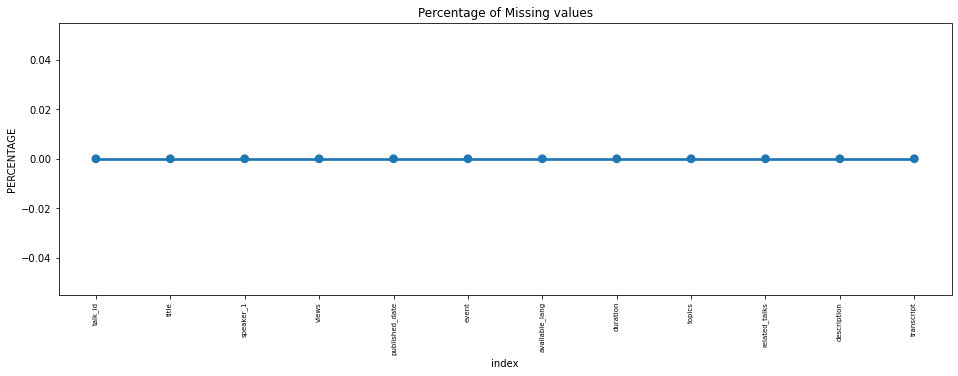

In [ ]:
missing = pd.DataFrame((ted_talk.isnull().sum())*100/ted_talk.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**As we can see now we do not have any null or missing value in our data**

In [ ]:
# Checking Duplicate Values
value=len(ted_talk[ted_talk.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#**Transformation of the columns**

1.converting time from seconds to minutes.

In [ ]:
ted_talk['duration'] = pd.to_timedelta(ted_talk['duration'])

In [ ]:
ted_talk['min_length'] = ted_talk['duration'].dt.total_seconds() / 60
ted_talk.drop('duration', axis = 1, inplace = True)

2.Breaking published_date column

In [ ]:
ted_talk['published_date'][1]

'2006-06-27'

In [ ]:
ted_talk['published_date'] = pd.to_datetime(ted_talk['published_date'])

In [ ]:
ted_talk['year'] = ted_talk['published_date'].dt.year
ted_talk['month'] = ted_talk['published_date'].dt.month
ted_talk['day'] = ted_talk['published_date'].dt.day_name()

In [ ]:
ted_talk.drop('published_date', axis = 1, inplace = True)

In [ ]:
ted_talk.head(1)

,talk_id,title,speaker_1,views,event,available_lang,topics,related_talks,description,transcript,min_length,year,month,day
0,1,Averting the climate crisis,Al Gore,3523392,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...","['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1.628333e-08,2006,6,Tuesday


Now we have three new column for year , month and day

In [ ]:
ted_talk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   views           4005 non-null   int64  
 4   event           4005 non-null   object 
 5   available_lang  4005 non-null   object 
 6   topics          4005 non-null   object 
 7   related_talks   4005 non-null   object 
 8   description     4005 non-null   object 
 9   transcript      4005 non-null   object 
 10  min_length      4005 non-null   float64
 11  year            4005 non-null   int64  
 12  month           4005 non-null   int64  
 13  day             4005 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 438.2+ KB


# **Exploratory Data Analysis Of The Data Set**

**Analysing the views on basis of year**

In [ ]:
ted_talk['year'].value_counts()

2019    702
2018    477
2017    315
2012    303
2011    255
2013    242
2016    242
2014    240
2010    230
2015    220
2009    215
2020    211
2008    185
2007    119
2006     49
Name: year, dtype: int64

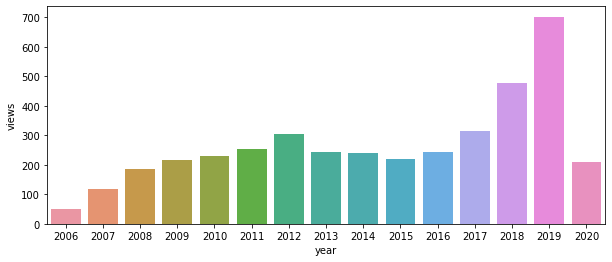

In [ ]:
#checking years having maximum release 
view_acc_year = ted_talk[['year','views']].groupby('year').agg({'views' : 'count'})
view_acc_year = view_acc_year.sort_values('views',ascending=False)
view_acc_year.reset_index(inplace=True)

#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x ='year', y ='views',data = view_acc_year)


We have highest number of views on ted_talk in the year **2019** followed by 2018.

**Analysing the views on basis of month**

In [ ]:
ted_talk['month'].value_counts()

4     423
3     419
2     412
10    350
1     348
9     347
5     312
6     310
11    305
7     278
12    265
8     236
Name: month, dtype: int64

In [ ]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
ted_talk['month']= ted_talk['month'].map(month_dict)

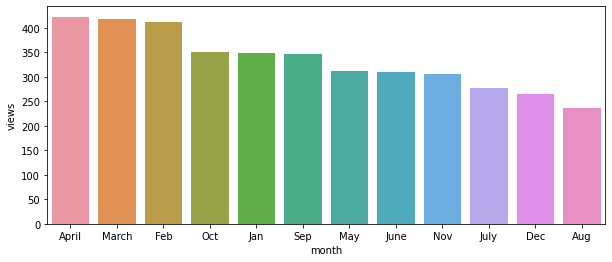

In [ ]:
#checking month having maximum release
view_acc_mon = ted_talk[['month','views']].groupby('month').agg({'views' : 'count'})
view_acc_mon = view_acc_mon.sort_values('views',ascending=False)
view_acc_mon.reset_index(inplace=True)

#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x ='month', y ='views',data = view_acc_mon)


We have highest number of views on ted_talk in the **April** followed by **March**.

**Analysing the views on basis of day**

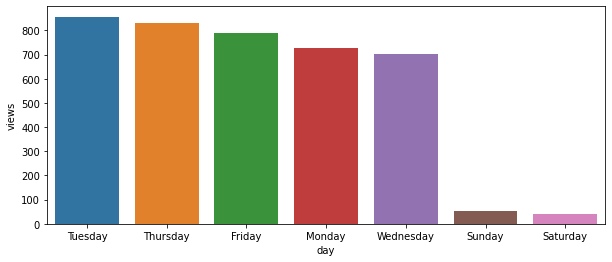

In [ ]:
#checking day having maximum release
view_acc_day = ted_talk[['day','views']].groupby('day').agg({'views' : 'count'})
view_acc_day = view_acc_day.sort_values('views',ascending=False)
view_acc_day.reset_index(inplace=True)

#Plotting the years having maximum release 
plt.figure(figsize=(10,4))
sns.barplot(x ='day', y ='views',data = view_acc_day)


We have highest number of views on ted_talk **Tuesday** and **Thursday**

**Explore the event column**

In [ ]:
#print the len of unique values in event column
len(ted_talk.event.unique())

459

We have 459 unique entries in event column

In [ ]:
#find the most frequent event categories
ted_event = ted_talk[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
ted_event.reset_index(inplace=True)
ted_event

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


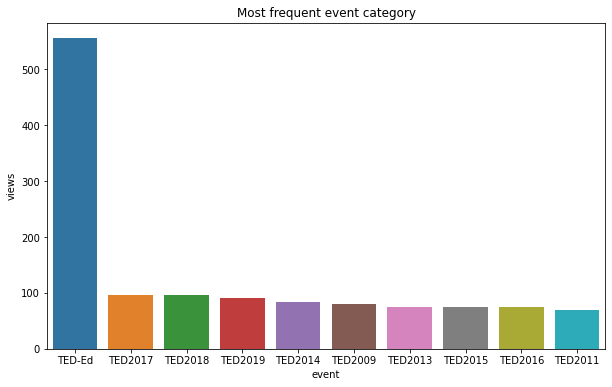

In [ ]:
#plotting the most frequent event category
plt.figure(figsize=(10,6))
plt.title('Most frequent event category')
sns.barplot(x ='event',y ='views',data = ted_event)

As we can see that **TED-Ed** is the most frequent event category with 556 entries followed by **TED2017** and **TED2018**.

**Find the most popular speaker**

In [ ]:
#finding the most popular speaker from the dataset
ted_speaker = ted_talk.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(15,['views'])
ted_speaker.reset_index(inplace=True)
ted_speaker

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


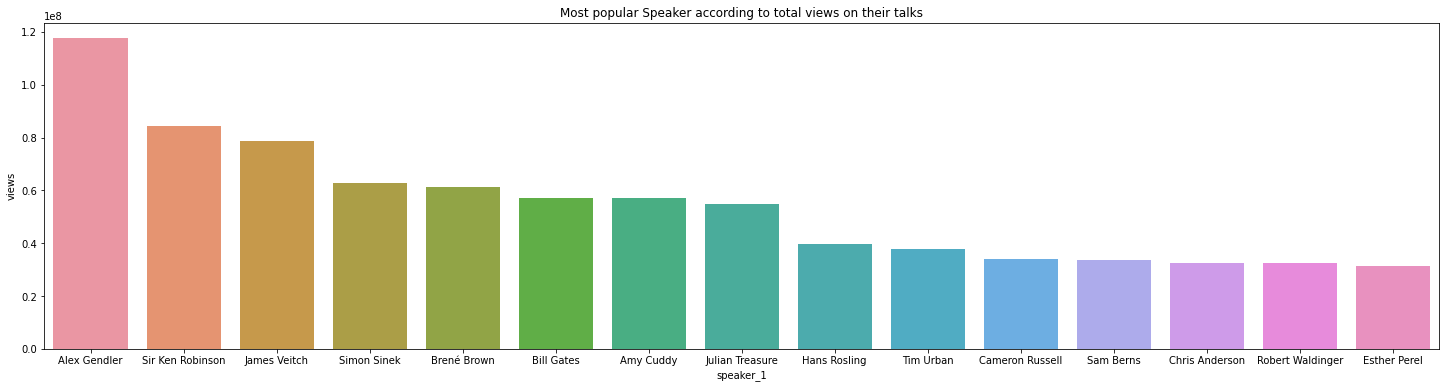

In [ ]:
#ploting most popular Speaker according to total views on their talks
plt.figure(figsize=(25,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x ='speaker_1',y ='views',data = ted_speaker)

As we can see that **Alex Gendler** is the most popular speaker followed by Sir **Ken Robinson**

**Explore speaker_1 column**

In [ ]:
#Extarcting the records of top 5 most viewed videos
top_ted = ted_talk.nlargest(5, ['views'])
top_ted[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


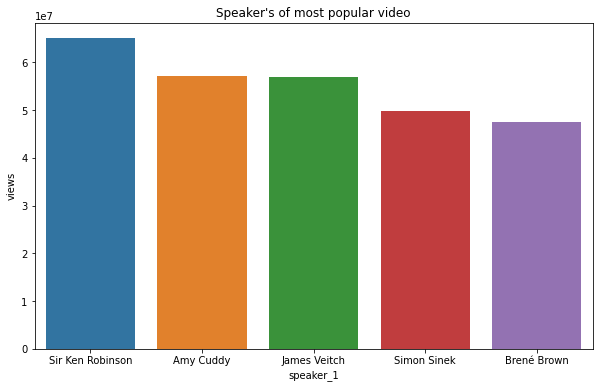

In [ ]:
#finding Speaker's of most popular video
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular video")
sns.barplot(x ='speaker_1',y ='views',data = top_ted)

**Sir Ken Robinson's** talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 6.5 million views.

**Pairplot among title , views , topics , min_length , year** 

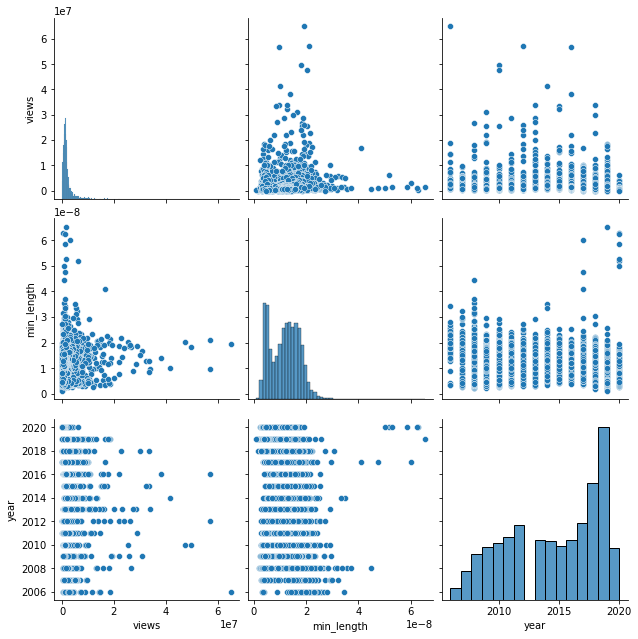

In [ ]:
sns.pairplot(ted_talk[['title','views','topics','min_length','year']],  size=3)
plt.show()

**Title column**

In [ ]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


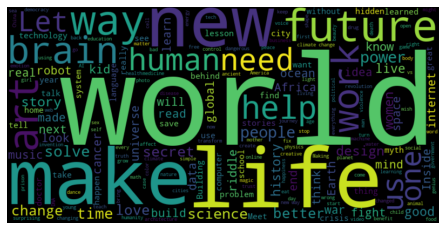

In [ ]:
#chcking word cloud from title column
text = " ".join(topic for topic in ted_talk.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (18,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

As we can see that mejoriity of titles contains words : life, world, make, new, human, brain and future.

#**Ploting some numerical features.**

In [ ]:
ted_talk.describe().columns

Index(['talk_id', 'views', 'min_length', 'year'], dtype='object')

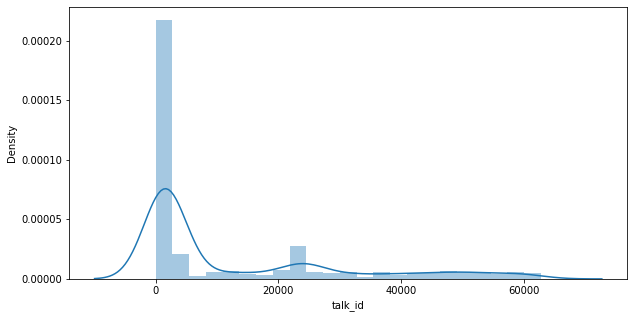

In [ ]:
#plotting the distplot of talk_id
plt.figure(figsize=(10,5))
sns.distplot(ted_talk['talk_id'])

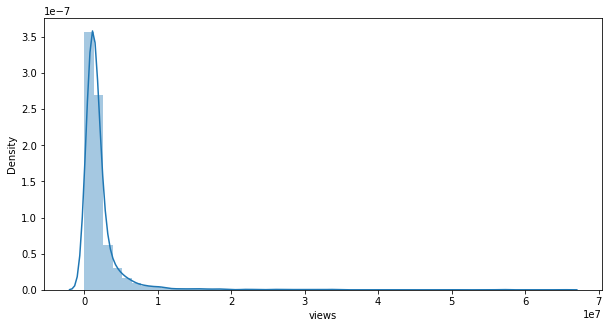

In [ ]:
#plotting the distplot of tareget variable
plt.figure(figsize=(10,5))
sns.distplot(ted_talk['views'])

Here. our target variable is rightly skewed.

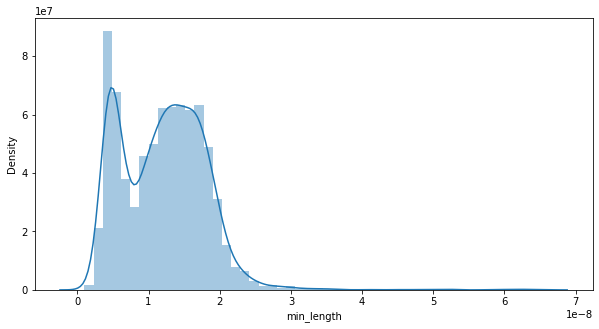

In [ ]:
#plotting the distplot of min_length
plt.figure(figsize=(10,5))
sns.distplot(ted_talk['min_length'])

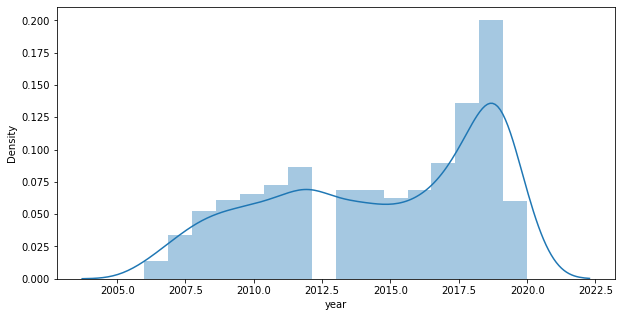

In [ ]:
#plooting the distplot of year
plt.figure(figsize=(10,5))
sns.distplot(ted_talk['year'])

#**Feature Engineering**

**event column**

In [ ]:
#applying feature engineering on event column
event_ted = ted_talk.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
event_ted = event_ted.to_dict()
event_ted = event_ted.values()
event_ted =  list(event_ted)[0]
ted_talk['avg_event_views'] = ted_talk['event'].map(event_ted)

After doing feature engineering we can drop event column from our data.

In [ ]:
#drop event column
ted_talk = ted_talk.drop(columns='event')

In [ ]:
ted_talk.head(1)

,talk_id,title,speaker_1,views,available_lang,topics,related_talks,description,transcript,min_length,year,month,day,avg_event_views
0,1,Averting the climate crisis,Al Gore,3523392,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...","['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1.628333e-08,2006,June,Tuesday,3.876291e+06


**Converting available_lang column into number_of_lang**

In [ ]:
ted_talk['number_of_lang'] = ted_talk['available_lang'].apply(lambda x: len(x))

As we have converted a column now we can drop the old column.

In [ ]:
#drop available_lang column
ted_talk = ted_talk.drop(columns='available_lang')

 **speaker_1 column**

In [ ]:
# feature engineering on speaker_1 column
speaker_ted = ted_talk.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker_ted = speaker_ted.to_dict()
speaker_ted = speaker_ted.values()
speaker_ted =  list(speaker_ted)[0]
ted_talk['speaker_vi_avg'] = ted_talk['speaker_1'].map(speaker_ted)

In [ ]:
ted_talk.head(1)

,talk_id,title,speaker_1,views,topics,related_talks,description,transcript,min_length,year,month,day,avg_event_views,number_of_lang,speaker_vi_avg
0,1,Averting the climate crisis,Al Gore,3523392,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1.628333e-08,2006,June,Tuesday,3.876291e+06,270,2190599.25


**Converting topics column into numerical column**

In [ ]:
ted_talk['topics'] = ted_talk.apply(lambda x: eval(x['topics']), axis=1)

In [ ]:
ted_talk['number_of_topics'] = ted_talk.apply(lambda x: len(x['topics']), axis=1)

In [ ]:
ted_talk.head(1)

,talk_id,title,speaker_1,views,topics,related_talks,description,transcript,min_length,year,month,day,avg_event_views,number_of_lang,speaker_vi_avg,number_of_topics
0,1,Averting the climate crisis,Al Gore,3523392,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1.628333e-08,2006,June,Tuesday,3.876291e+06,270,2190599.25,9


We have converted topics column into numerical column now,we can drop the column.

In [ ]:
#dropping topics column
ted_talk = ted_talk.drop(columns='topics')

#**Data Cleaning**

**Looking for outliers**

In [ ]:
q1 = ted_talk.quantile(0.25)
q3 = ted_talk.quantile(0.75)
IQR = q3 - q1

((ted_talk < (q1 - 1.5 * IQR)) | (ted_talk > (q3 + 1.5 * IQR))).sum()

avg_event_views     156
day                   0
description           0
min_length           21
month                 0
number_of_lang      143
number_of_topics    116
related_talks         0
speaker_1             0
speaker_vi_avg      373
talk_id             119
title                 0
transcript            0
views               393
year                  0
dtype: int64

As we have soo many outliers in our dataset.we have to remove it otherwise it will affect our regression model.

In [ ]:
for value in ['avg_event_views','min_length','number_of_lang','number_of_topics','speaker_vi_avg','talk_id','views']:
  q1 = ted_talk[value].quantile(0.25)
  q3 = ted_talk[value].quantile(0.75)
  IQR = q3 - q1

  ted_talk[value]=np.where(ted_talk[value]<(q1 - 1.5 * IQR),(q1 - 1.5 * IQR),np.where(ted_talk[value]>(q3 + 1.5 * IQR),(q3 + 1.5 * IQR),ted_talk[value]))

In [ ]:
q1 = ted_talk.quantile(0.25)
q3 = ted_talk.quantile(0.75)
IQR = q3 - q1
((ted_talk < (q1 - 1.5 * IQR)) | (ted_talk > (q3 + 1.5 * IQR))).sum()

avg_event_views     0
day                 0
description         0
min_length          0
month               0
number_of_lang      0
number_of_topics    0
related_talks       0
speaker_1           0
speaker_vi_avg      0
talk_id             0
title               0
transcript          0
views               0
year                0
dtype: int64

Now we can proceed with our data as its have no outliers.

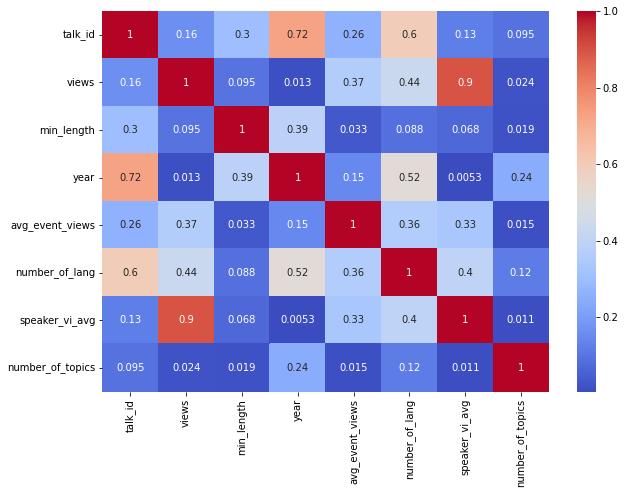

In [ ]:
plt.figure(figsize=(10,7))
correlation = ted_talk.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**dropping the unnecessary column**

In [ ]:
ted_talk.head(1)

,talk_id,title,speaker_1,views,related_talks,description,transcript,min_length,year,month,day,avg_event_views,number_of_lang,speaker_vi_avg,number_of_topics
0,1.0,Averting the climate crisis,Al Gore,3523392.0,"{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1.628333e-08,2006,June,Tuesday,3.778944e+06,270.0,2190599.25,9.0


In [ ]:
#drooping the unsueful and categorical columns
ted_talk.drop(columns = ['title','speaker_1','related_talks','description','transcript'],inplace = True)

#**Defining the dependent and independent variables.**

In [ ]:
#separating the dependent and independent variables
y = ted_talk['views']
X = ted_talk.drop(columns='views')

In [ ]:
X.columns

Index(['talk_id', 'min_length', 'year', 'month', 'day', 'avg_event_views',
       'number_of_lang', 'speaker_vi_avg', 'number_of_topics'],
      dtype='object')

#**one hot encoding**

In [ ]:
X=pd.get_dummies(X)
X.shape

(4005, 26)

In [ ]:
X.head(1)

,talk_id,min_length,year,avg_event_views,number_of_lang,speaker_vi_avg,number_of_topics,month_April,month_Aug,month_Dec,...,month_Nov,month_Oct,month_Sep,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1.0,1.628333e-08,2006,3.778944e+06,270.0,2190599.25,9.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#**Applying train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Scaling the data**

In [ ]:
#transforming the data
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

#**linear regression model.**

In [ ]:
#fitting multiple linear regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.score(X_train, y_train)

0.8186237507470338

In [ ]:
y_pred = regressor.predict(X_test)

#**Regression Evaluation Metrics**

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:


**Mean Squared Error (MSE)** is the mean of the squared errors:


**Root Mean Squared Error (RMSE)** bold text is the square root of the mean of the squared errors:


In [ ]:
MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 197135950080.45413
MAE : 258205.11423220974
RMSE : 443999.9437842916


In [ ]:
r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8347346360711396
Adjusted R2 :  0.8291830863784388


83% with linear regression

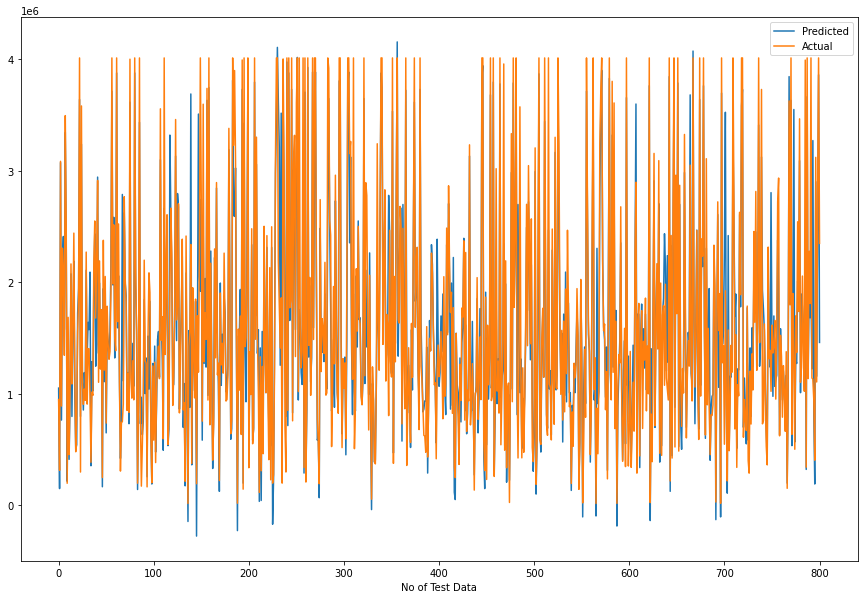

In [ ]:
#plot a graph
plt.figure(figsize=(15,10))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

We see above graph our prediction is quiet good.!:)



#**Lasso regression model**

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [ ]:
lass = Lasso(alpha = 0.1, max_iter = 3000)

In [ ]:
lass.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lass.score(X_train, y_train)

0.8187139914183563

In [ ]:
prediction_lasso = lass.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(prediction_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(prediction_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(prediction_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(prediction_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 196989990266.96735
MAE : 255971.34321157465
RMSE : 443835.5441680706
R2 : 0.8348569988450784
Adjusted R2 :  0.8293095595297968


83% with lasso regression

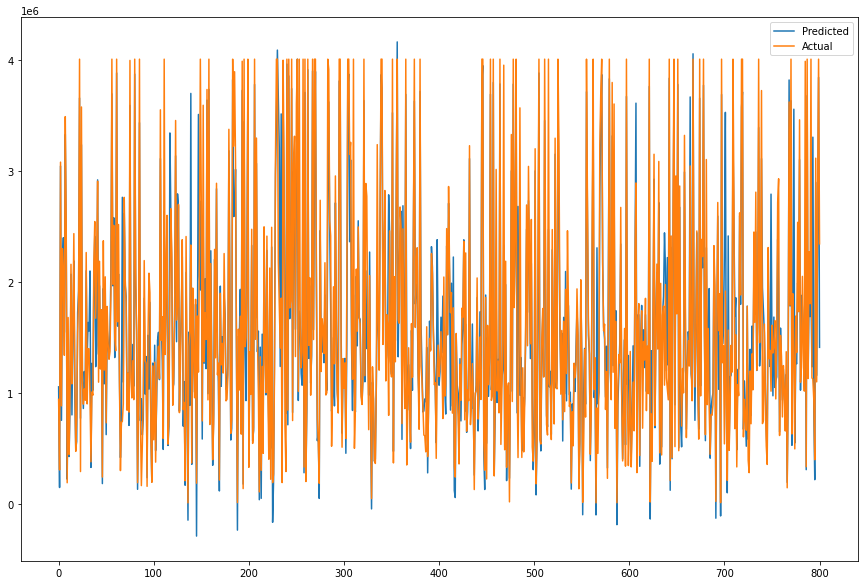

In [ ]:
plt.figure(figsize=(15,10))
plt.plot((prediction_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#**Cross validation and hyperparametertunning for lasso**

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -227966970137.25977


In [ ]:
MSE  = mean_squared_error((y_test),(prediction_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(prediction_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(prediction_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 196989990266.96735
RMSE : 443835.5441680706
R2 : 0.8348569988450784
Adjusted R2 :  0.8293095595297968


#**Ridge Regression**

Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables).

In [ ]:
ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, y_train)

0.8187138504005965

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test),(y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 197012475172.63742
MAE : 256065.34238410502
RMSE : 443860.87366723083
R2 : 0.8348381490304355
Adjusted R2 :  0.8292900765172461


83% with ridge.

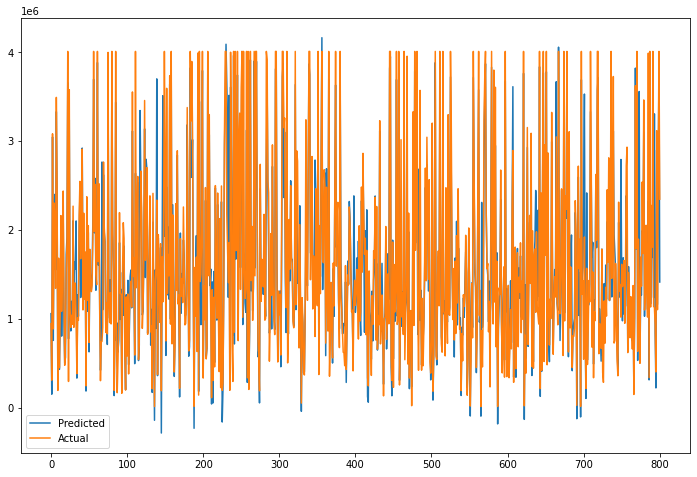

In [ ]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#**Cross validation and hyperparametertunning for Ridge**

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 100}  the negative mean squared error is:  -228134291901.52066


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 196992110669.7777
RMSE : 443837.93288741977
R2 : 0.834855221243672
Adjusted R2 :  0.8293077222156816


#**Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor(criterion='mae')

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='mae')

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
MSE  = mean_squared_error((y_train),(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_train),(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_train),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_train),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 54303369149.625854
MAE : 95036.71732053682
RMSE : 233030.83304495536
R2 : 0.9555257293647472
Adjusted R2 :  0.9540317616173097


95% with random forest.

#**Conclusion**

* TED Talks mainly provide inspirational and educational content that helps individuals look at things from a diffrent prespective.There is a wide variety of TED Talks, ranging from technology  to comedy.From the given dataset,We can infer that the popularity of a TED Talk depends on the number of languages available.It also marked with a good sense of humor,presentation skills and mostimportantly,choice of topic etc.

* According to analysis We have highest number of views on ted talk in the year **2019** followed by 2018.Also we have highest number of views on ted talk in the **April** followed by **March**.

* **TED-ED** is the most frequent event category with 556 entries followed by **TED2017** and **TED2018**.

* **Alex Gendler** is the most popular speaker followed by sir **Ken Robinson** according to total views on their talks.

* **Sir Ken Robinson's** talk on "Do School Kill Creativity?" is the most popular TED Talk of all time with more than 6.5 million view.

* As we can see that mejority of titles contain words: **Life , World , Make ,   New , Human , Brain and Future**.

* Applying train test split and we found linear regression 83%.As well as 83% with lasso regression and ridge regression.

* Random Forest Regressor with 95%.

* The objective of this work was to understand a little about the TED talks ratings. They are intersting metrics to evaluate a TED Talk and this work explored the many results,how people evaluate them and what may influence these results.